In [1]:
#登录微信并获取好友列表
import itchat
itchat.auto_login(hotReload = True)
friends = itchat.get_friends(update = True)

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
#对好友性别计数
sexes = [friend['Sex'] for friend in friends[1:]]
counts = [c[1] for c in Counter(sexes).items()]

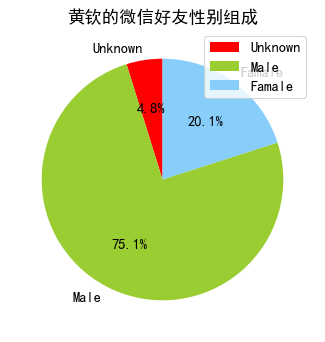

LOG OUT!


In [11]:
#用plt画图展示好友性别组成情况
labels = ['Unknown', 'Male', 'Famale']
colors = ['red', 'yellowgreen', 'lightskyblue']
plt.figure(figsize=(8, 5), dpi = 80)
plt.rc('font', family='SimHei', size=13)
plt.axes(aspect = 1)
plt.pie(counts, labels = labels,
		colors = colors,
		labeldistance = 1.1,
		autopct = "%3.1f%%",
		shadow = False,
		startangle = 90, 
		pctdistance = 0.6)
plt.legend(loc = 'upper right')
plt.title(u'%s的微信好友性别组成' % friends[0]['NickName'])
plt.show()

In [80]:
#youtu模块初始化
import TencentYoutuyun
appid = '10122237'
secret_id = 'AKID77zhEbe8798xb5pWTJzVq11ykLl1rygH'
secret_key = 'ZxAD5nKzTmttiLn3EE2hBUcaP5bx8C8v'
userid = '250761123'
end_point = TencentYoutuyun.conf.API_YOUTU_END_POINT
youtu = TencentYoutuyun.YouTu(appid, secret_id, secret_key, userid, end_point)

In [3]:
import pandas as pd
df_friends = pd.DataFrame(friends)
df_friends.columns

Index(['Alias', 'AppAccountFlag', 'AttrStatus', 'ChatRoomId', 'City',
       'ContactFlag', 'DisplayName', 'EncryChatRoomId', 'HeadImgFlag',
       'HeadImgUrl', 'HideInputBarFlag', 'IsOwner', 'KeyWord', 'MemberCount',
       'MemberList', 'NickName', 'OwnerUin', 'PYInitial', 'PYQuanPin',
       'Province', 'RemarkName', 'RemarkPYInitial', 'RemarkPYQuanPin', 'Sex',
       'Signature', 'SnsFlag', 'StarFriend', 'Statues', 'Uin', 'UniFriend',
       'UserName', 'VerifyFlag', 'WebWxPluginSwitch'],
      dtype='object')

In [ ]:
df_friends.iloc[1, [2, 3]]
df_friends.loc[range(1, len(df_friends)), ['NickName', 'City']].count()

In [45]:
#好友称呼列表生成式，如果加了备注，取备注名，否则取昵称
[friend['RemarkName'] if friend['RemarkName'] else friend['NickName'] for friend in friends]

In [46]:
#下载保存头像文件
import os.path
img_dir = "./head_img/"
for index, friend in enumerate(friends):
    #好友如果加了备注，取备注作为friend_name,否则使用昵称
    friend_name = friend['RemarkName'] if friend['RemarkName'] else friend['NickName']
    head_img_file = friend_name + '.jpg'
    head_img_path = os.path.abspath(os.path.join(img_dir, head_img_file))
    if not os.path.exists(head_img_path):
        print("Getting head image of {}".format(friend_name))
        head_img_file = img_dir + friend_name + '.jpg'
        #获取头像文件并保存，参数为好友的'UserName'字段
        imgData = itchat.get_head_img(userName = friend['UserName'])
        with open(head_img_file, 'wb') as f:
            f.write(imgData)
    else:
        print("Head image file of {} already exists.".format(friend_name))

In [90]:
from functools import reduce
tag = youtu.imagetag('cj.jpg')
tags = reduce(lambda x, y: x+y, [t['tag_name'] for t in tag['tags']])
img_tags = tags.encode('iso8859-1').decode('utf-8')

In [ ]:
#分析好友头像使用人脸情况
use_heads = []
no_heads = []
others = []
for index, file_name in enumerate(os.listdir(img_dir)):
    file_path = os.path.abspath(os.path.join(img_dir, file_name))
    friend_name = os.path.splitext(file_name)[0]
    try:
        #检测图片文件中是否出现人脸，返回值为json对象
        result = youtu.DetectFace(file_path)
    except Exception as e:
        print(e)
    #根据errorcode判断是否出现人脸，0为出现人脸，-1101为未发现人脸，-1131为非法图片文件
    if 0 == result['errorcode']:
        print("{} 使用了人像作为头像".format(friend_name))
        use_heads.append(friend_name)
    elif -1101 == result['errorcode']:
        print("{} 没有使用人像作为头像".format(friend_name))
        no_heads.append(friend_name)
    else:
        other_result = {}
        other_result['friend_name'] = friend_name
        other_result['errorcode'] = result['errorcode']
        other_result['errormsg'] = result['errormsg']
        print(other_result)
        others.append(other_result)
print("There are {} friends who use head portrait and {} friends who don't use head portrait.".format(len(use_heads), len(no_heads)))

In [121]:
import json
json_face = {"use_face": use_heads, "not_face":no_heads}
json.dump(json_face, open('face.json', 'w'))

In [ ]:
friends_tags = ""
tags_json = {}
for file_name in os.listdir(img_dir):
    file_path = os.path.abspath(os.path.join(img_dir, file_name))
    friend_name = os.path.splitext(file_name)[0]
    try:
        tag = youtu.imagetag(file_path)
        #friend_tags = ','.join(list(map(lambda x:x['tag_name'], tag['tags'])))
        tags = list(map(lambda x:x['tag_name'].encode('iso8859-1').decode('utf-8'), tag['tags']))
        tags_json[friend_name] = tags
        friend_tags = ','.join(list(map(lambda x:x['tag_name'].encode('iso8859-1').decode('utf-8'), tag['tags'])))
        print(friend_name, friend_tags)
        friends_tags += friend_tags + ','
    except Exception as e:
        print(e)
print(friends_tags)

In [4]:
import numpy as np
from PIL import Image

In [130]:
with open('friend_tags.json', 'w') as tag_file:
    json.dump(tags_json, tag_file)

In [138]:
#统计标签出现次数
tag_counter = {}
for tags in tags_json.values():
    for tag in tags:
        if tag in tag_counter:
            tag_counter[tag] += 1
        else:
            tag_counter[tag] = 1

In [141]:
#对标签出现次数排序
sorted_tag_counter = sorted(tag_counter.items(), key = lambda x: x[1], reverse=True)
sorted_tag_counter[:10]

[('树木', 97),
 ('天空', 86),
 ('女孩', 81),
 ('卡通', 69),
 ('合影', 58),
 ('男孩', 55),
 ('小孩', 53),
 ('云', 43),
 ('截图', 42),
 ('山', 37)]

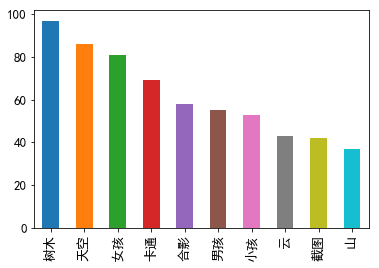

In [156]:
import pandas as pd
s_tag = pd.Series(tag_counter)
s_tag = s_tag.sort_values(ascending=False)
plt.rc('font', family='SimHei', size=13)
s_tag[:10].plot(kind='bar')

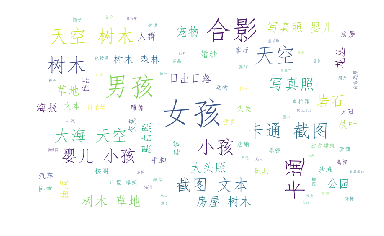

In [151]:
from wordcloud import WordCloud
#back_coloring = np.array(Image.open('round.jpg'))
wordcloud = WordCloud(
        font_path='simfang.ttf',
        background_color="white",
        max_words=1200,
        mask=None, 
        max_font_size=75,
        random_state=45,
        width=800, 
        height=480, 
        margin=15
    )

wordcloud.generate(friends_tags)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [70]:
#分析好友签名
#用jieba模块对好友签名分词，并把分词结果连接起来
#用SnowNLP模块提取好友签名的情绪量化值
import re
from snownlp import SnowNLP
import json
import jieba.analyse

signatures = ''
emotions = []
emotions_json = {}
for friend in friends:
    friend_name = friend['RemarkName'] if friend['RemarkName'] else friend['NickName']
    signature = friend['Signature']
    if signature != '':
        #signature = signature.strip().replace('span', '').replace('class', '').replace('emoji', '')
        #signature = re.sub('(1f[\d]+)', '', signature)
        signature = signature.strip()
        signature = re.sub('<span.*span>', '', signature)
        #print(signature)
        if(len(signature) > 0):
            nlp = SnowNLP(signature)
            emotions.append(nlp.sentiments)
            emotions_json[friend_name] = nlp.sentiments
            #print(nlp.sentiments)
            signatures += ' '.join(jieba.analyse.extract_tags(signature, 5))
    with open('signatures.txt', 'w') as f:
        f.write(signatures)
    with open('friend_emotion.json', 'w') as f:
        json.dump(emotions_json, f)

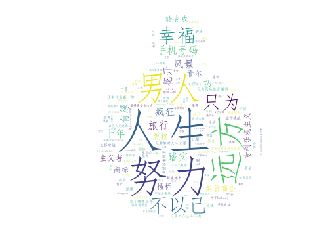

In [86]:
#用wordcloud模块展示好友签名出现频率较高的关键词
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

back_coloring = np.array(Image.open('round.jpg'))
wordcloud = WordCloud(
    font_path='simfang.ttf',
    background_color = 'white',
    mask = back_coloring,
    width = 1200,
    height = 1000)
wordcloud.generate(signatures)
plt.axis("off")
plt.imshow(wordcloud)
wordcloud.to_file('signature.jpg')

No handles with labels found to put in legend.


<Container object of 3 artists>

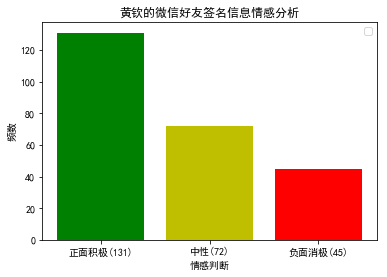

In [103]:
#用plt画图展示好友签名的情感判断情况
#sentiments>0.66 情绪正面积极
count_good = len(list(filter(lambda x:x>0.66, emotions)))
#0.66>=sentiments>0.33 情绪中性
count_normal = len(list(filter(lambda x:0.66 >= x > 0.33, emotions)))
#sentiments<=0.33 情绪正面积极
count_bad = len(list(filter(lambda x:x<=0.33, emotions)))
plt.xticks(range(3), ["正面积极({})".format(count_good), "中性({})".format(count_normal), "负面消极({})".format(count_bad)])
plt.rcParams['font.sans-serif'] = ['simHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('情感判断')
plt.ylabel('频数')
#plt.legend(loc='upper right')
plt.title("{}的微信好友签名信息情感分析".format(friends[0]["NickName"]))
plt.bar(range(3), [count_good, count_normal, count_bad], color = 'gyr')

In [42]:
#好友地域分布情况分析
#城市
import matplotlib.pyplot as plt
from collections import Counter
cities = [friend['City'] for friend in friends[1:]]
counter_city = Counter(cities)
counter_city['Unknown'] = counter_city.pop('')
sorted_counter_city = sorted(counter_city.items(), key = lambda x: x[1], reverse=True)
sorted_counter_city[:10]

[('Unknown', 97),
 ('成都', 70),
 ('德宏', 21),
 ('德阳', 15),
 ('涪陵', 15),
 ('昆明', 12),
 ('沙坪坝', 11),
 ('江北', 11),
 ('渝北', 10),
 ('九龙坡', 7)]

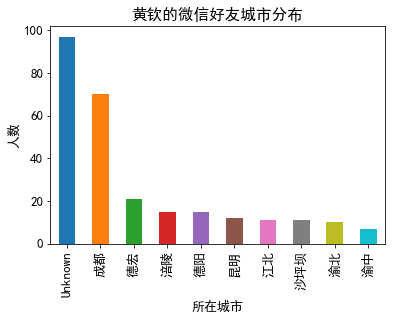

In [43]:
#画图展示
import pandas as pd
counter_city = pd.Series(counter_city)
counter_city = counter_city.sort_values(ascending=False)
plt.rc('font', family='SimHei', size=13)
plt.xlabel('所在城市')
plt.ylabel('人数')
#plt.legend(loc='upper right')
plt.title("{}的微信好友城市分布".format(friends[0]["NickName"]))
counter_city[:10].plot(kind='bar')

<Container object of 10 artists>

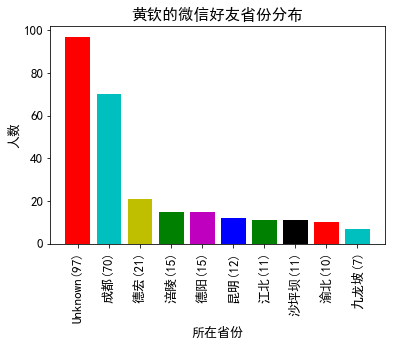

In [55]:
#画图展示，另一种方式
import pandas as pd
counter_city = pd.Series(counter_city)
counter_city = counter_city.sort_values(ascending=False)
labels = ['{}({})'.format(counter_city.index[i], str(counter_city[i])) for i in range(10)]
plt.xticks(range(10), labels, rotation=90)
plt.rcParams['font.sans-serif'] = ['simHei']
plt.xlabel('所在省份')
plt.ylabel('人数')
plt.title("{}的微信好友省份分布".format(friends[0]["NickName"]))
top_10 = counter_city[:10]
plt.bar(range(10), 
        top_10, 
        color = 'rcygmbgk',
        )

In [3]:
#好友地域分布情况分析
#省份
import matplotlib.pyplot as plt
from collections import Counter
province = [friend['Province'] for friend in friends[1:]]
counter_province = Counter(province)
counter_province['Unknown'] = counter_province.pop('')
sorted_counter_province = sorted(counter_province.items(), key = lambda x: x[1], reverse=True)
sorted_counter_province[:10]

[('重庆', 116),
 ('四川', 97),
 ('Unknown', 52),
 ('云南', 39),
 ('广东', 10),
 ('北京', 10),
 ('湖北', 5),
 ('江苏', 5),
 ('浙江', 4),
 ('陕西', 4)]

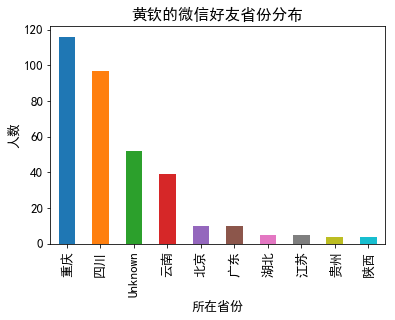

In [39]:
#画图展示
import pandas as pd
counter_province = pd.Series(counter_province)
counter_province = counter_province.sort_values(ascending=False)
plt.rc('font', family='SimHei', size=13)
plt.xlabel('所在省份')
plt.ylabel('人数')
#plt.legend(loc='upper right')
plt.title("{}的微信好友省份分布".format(friends[0]["NickName"]))
counter_province[:10].plot(kind='bar')

<Container object of 10 artists>

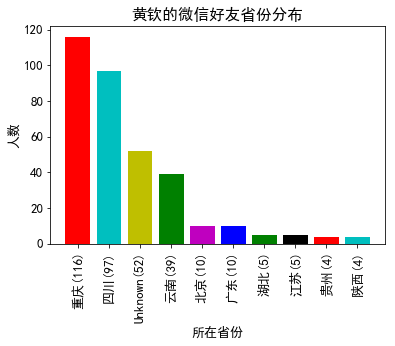

In [38]:
#画图展示，另一种方式
import pandas as pd
counter_province = pd.Series(counter_province)
counter_province = counter_province.sort_values(ascending=False)
labels = ['{}({})'.format(counter_province.index[i], str(counter_province[i])) for i in range(10)]
plt.xticks(range(10), labels, rotation=90)
plt.rcParams['font.sans-serif'] = ['simHei']
plt.xlabel('所在省份')
plt.ylabel('人数')
plt.title("{}的微信好友省份分布".format(friends[0]["NickName"]))
top_10 = counter_province[:10]
plt.bar(range(10), top_10, color='rcygmbgk')